# Creation of a neural network using Keras mechanisms for product classification

### Import of necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

### Data loading and preparation

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Base model_1 with two hidden layers, RELU activation, ADAM optimizer, 10 epochs and 20% Dropout

In [3]:
# Implementation of the model
model_1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_1 = model_1.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 5s 3ms/step - loss: 0.5379 - accuracy: 0.8052 - val_loss: 0.4138 - val_accuracy: 0.8497
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3994 - accuracy: 0.8541 - val_loss: 0.3644 - val_accuracy: 0.8656
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3613 - accuracy: 0.8653 - val_loss: 0.3542 - val_accuracy: 0.8712
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3422 - accuracy: 0.8716 - val_loss: 0.3422 - val_accuracy: 0.8721
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3238 - accuracy: 0.8806 - val_loss: 0.3382 - val_accuracy: 0.8776
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3134 - accuracy: 0.8849 - val_loss: 0.3188 - val_accuracy: 0.8847
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2986 - accuracy: 0.8881 - val_loss: 0.3170 - val_accuracy: 0.8848
Epoch 

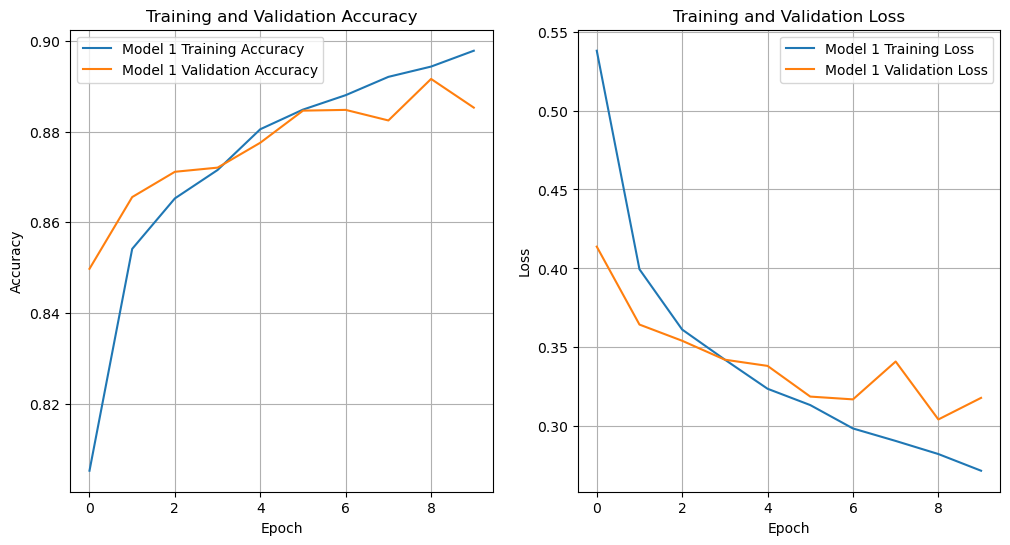

In [4]:
# Visualization of the training schedule
def plot_training_histories(histories, names):
    plt.figure(figsize=(12, 6))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=name + ' Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plotting loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history['loss'], label=name + ' Training Loss')
        plt.plot(history.history['val_loss'], label=name + ' Validation Loss')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

# Call the function to plot the graph
plot_training_histories([history_1], ['Model 1'])

In [5]:
def plot_training_histories_compare(histories, names):
    plt.figure(figsize=(12, 6))

    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

### Increasing the number of layers: model_2 with three hidden layers, RELU activation, ADAM optimizer, 10 epochs and 20% Dropout

In [7]:
# Implementation of the model
model_2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_2 = model_2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.5758 - accuracy: 0.7912 - val_loss: 0.4066 - val_accuracy: 0.8511
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4202 - accuracy: 0.8457 - val_loss: 0.3873 - val_accuracy: 0.8586
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3751 - accuracy: 0.8631 - val_loss: 0.3683 - val_accuracy: 0.8688
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3590 - accuracy: 0.8689 - val_loss: 0.3497 - val_accuracy: 0.8700
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3395 - accuracy: 0.8773 - val_loss: 0.3484 - val_accuracy: 0.8717
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3245 - accuracy: 0.8805 - val_loss: 0.3523 - val_accuracy: 0.8690
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3145 - accuracy: 0.8831 - val_loss: 0.3246 - val_accuracy: 0.8832
Epoch 

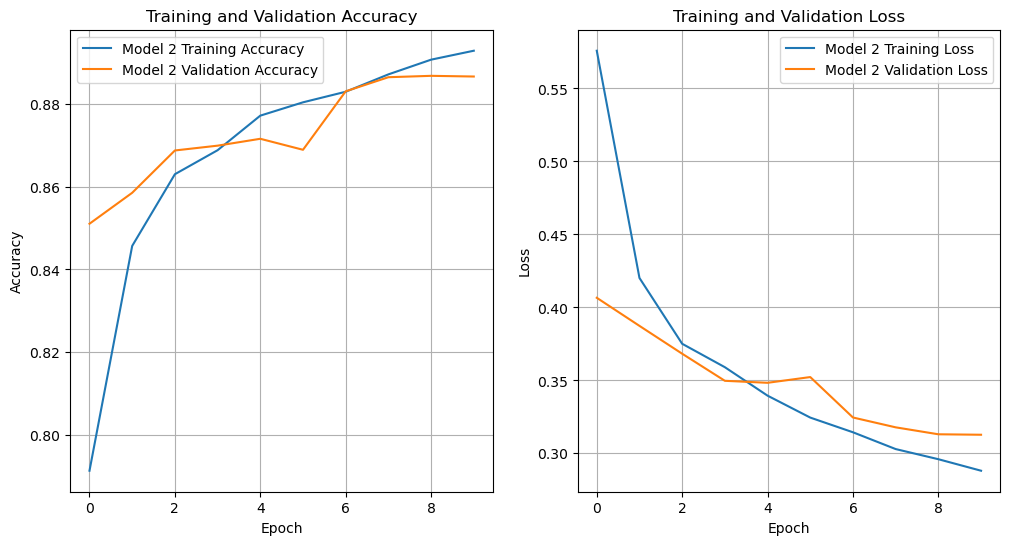

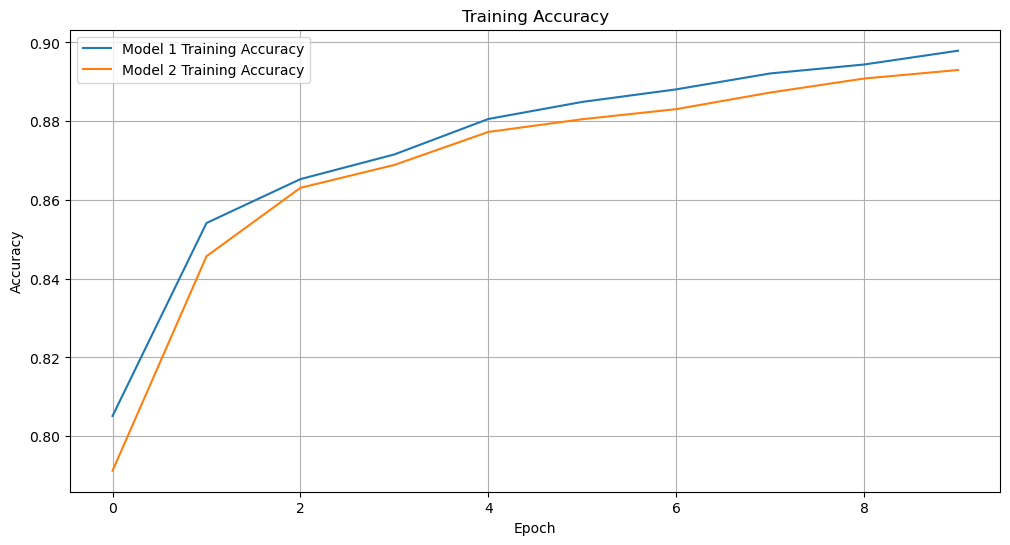

In [8]:
# Visualization of the training schedule
plot_training_histories([history_2], ['Model 2'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2], ['Model 1', 'Model 2'])

#### Conclusion: model_2 with three layers gives better test accuracy, than model_2 with two layers

### Changing optimizer: model_3 with three hidden layers, RELU activation, ADAMAX optimizer, 10 epochs and 20% Dropout

In [9]:
# Implementation of the model
model_3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_3.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_3 = model_3.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.6266 - accuracy: 0.7776 - val_loss: 0.4301 - val_accuracy: 0.8397
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4343 - accuracy: 0.8447 - val_loss: 0.3832 - val_accuracy: 0.8604
Epoch 3/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3888 - accuracy: 0.8584 - val_loss: 0.3619 - val_accuracy: 0.8676
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3628 - accuracy: 0.8692 - val_loss: 0.3451 - val_accuracy: 0.8744
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3386 - accuracy: 0.8772 - val_loss: 0.3400 - val_accuracy: 0.8805
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3246 - accuracy: 0.8809 - val_loss: 0.3214 - val_accuracy: 0.8801
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3091 - accuracy: 0.8875 - val_loss: 0.3337 - val_accuracy: 0.8788
Epoch 

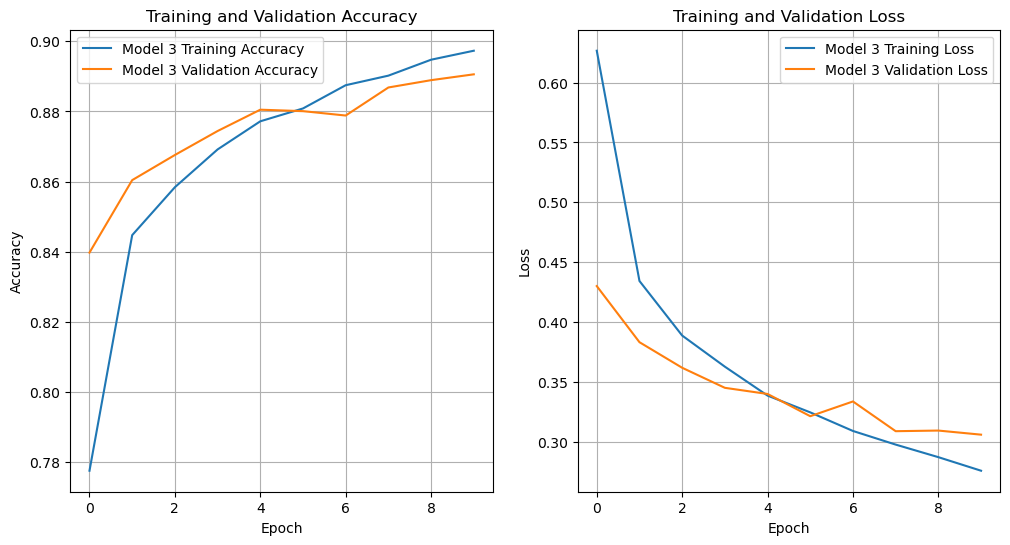

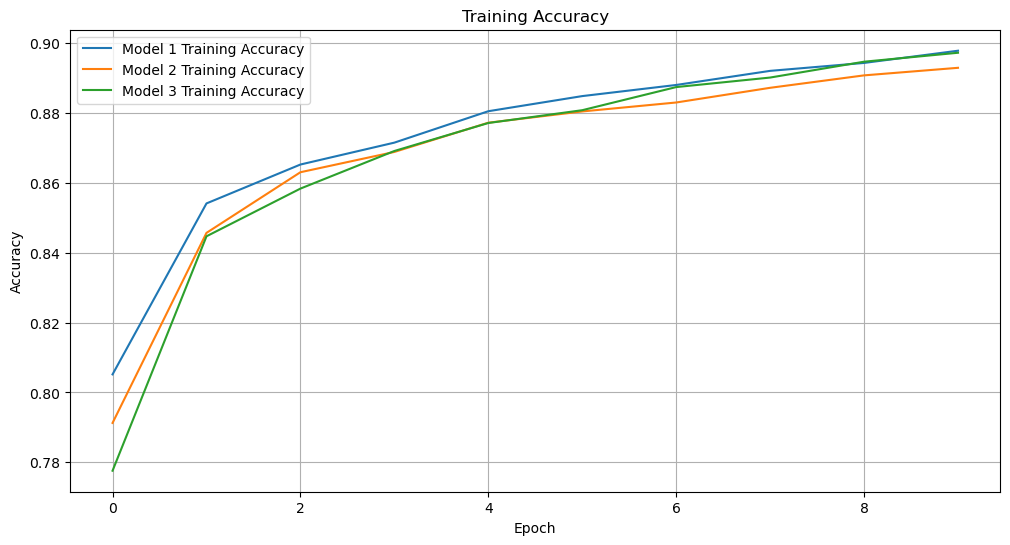

In [10]:
# Visualization of the training schedule
plot_training_histories([history_3], ['Model 3'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3], ['Model 1', 'Model 2', 'Model 3'])

#### Conclusion: model_3 with ADAMAX optimizer gives better test accuracy, than model_2 with ADAM optimizer

### Using L2 regularizer: model_4 with three hidden layers, RELU activation, ADAMAX optimizer, 10 epochs, 20% Dropout and L2 regularizer

In [11]:
# Implementation of the model
model_4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_4.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_4 = model_4.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_4.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 3.1897 - accuracy: 0.7533 - val_loss: 1.2563 - val_accuracy: 0.8117
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 1.0358 - accuracy: 0.7995 - val_loss: 0.8793 - val_accuracy: 0.8077
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.8475 - accuracy: 0.8076 - val_loss: 0.7805 - val_accuracy: 0.8167
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7958 - accuracy: 0.8114 - val_loss: 0.7358 - val_accuracy: 0.8271
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7701 - accuracy: 0.8147 - val_loss: 0.7087 - val_accuracy: 0.8319
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7465 - accuracy: 0.8172 - val_loss: 0.7065 - val_accuracy: 0.8329
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7299 - accuracy: 0.8217 - val_loss: 0.6893 - val_accuracy: 0.8357
Epoch 

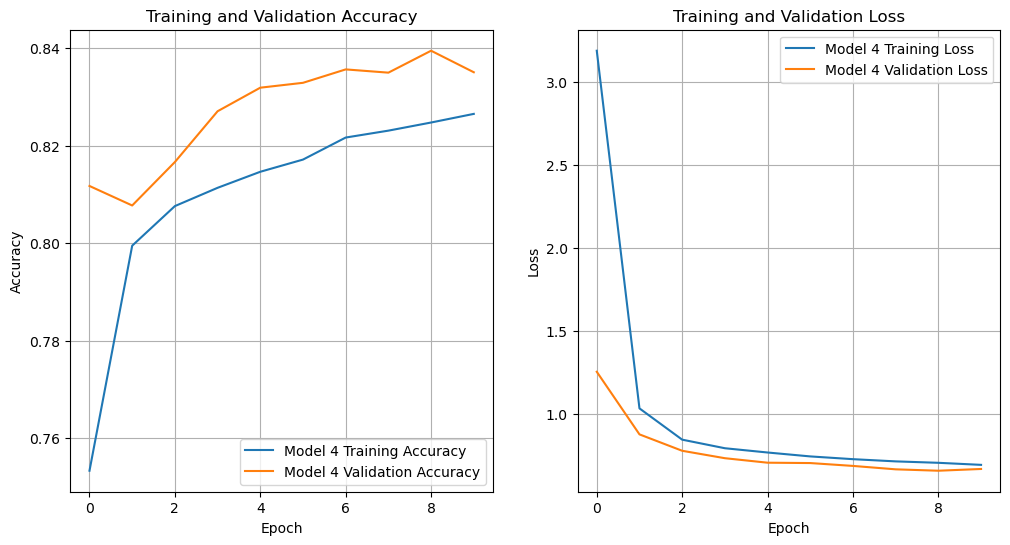

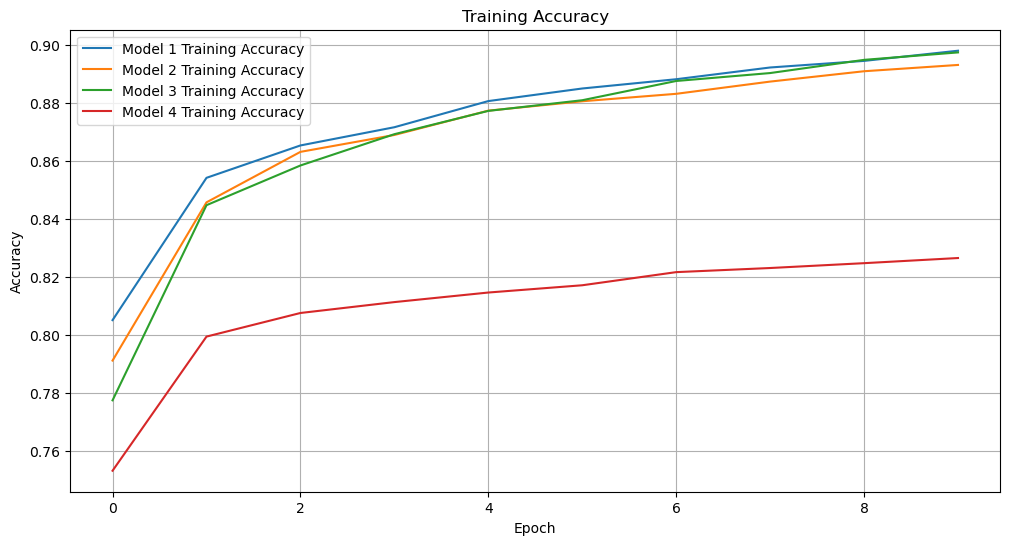

In [12]:
# Visualization of the training schedule
plot_training_histories([history_4], ['Model 4'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3, history_4], ['Model 1', 'Model 2', 'Model 3', 'Model 4'])

#### Conclusion: model_3 without regularizer gives better test accuracy, than model_4 with L2 regularizer

### Increasing the batch sise: model_5 with three hidden layers, RELU activation, ADAMAX optimizer, 10 epochs, 20% Dropout and batch size 128

In [15]:
# Implementation of the model
model_5 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_5.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_5 = model_5.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_5.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6737 - accuracy: 0.7622 - val_loss: 0.4342 - val_accuracy: 0.8432
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4526 - accuracy: 0.8411 - val_loss: 0.3875 - val_accuracy: 0.8593
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8563 - val_loss: 0.3608 - val_accuracy: 0.8708
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3687 - accuracy: 0.8665 - val_loss: 0.3527 - val_accuracy: 0.8715
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8744 - val_loss: 0.3396 - val_accuracy: 0.8767
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8781 - val_loss: 0.3286 - val_accuracy: 0.8785
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.8844 - val_loss: 0.3166 - val_accuracy: 0.8852
Epoch 

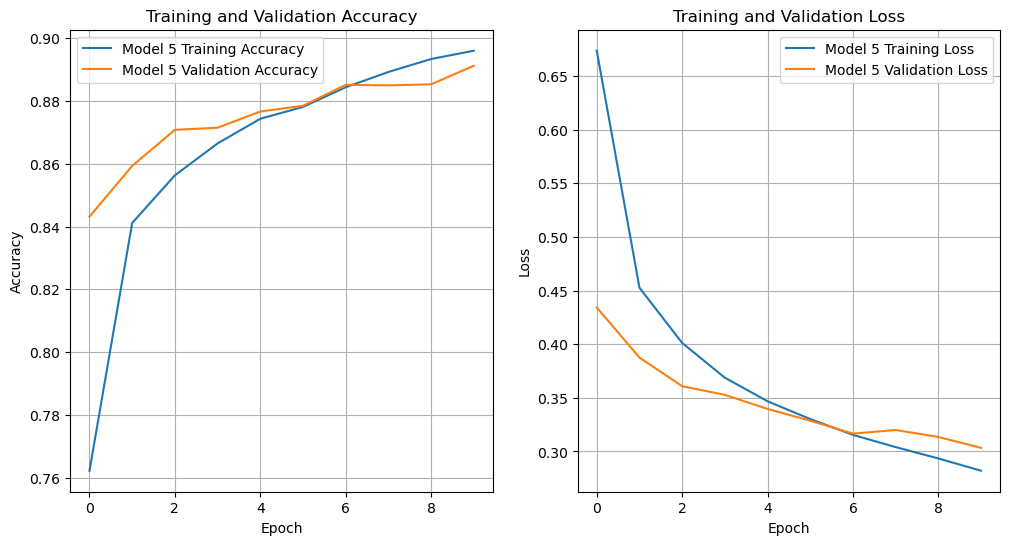

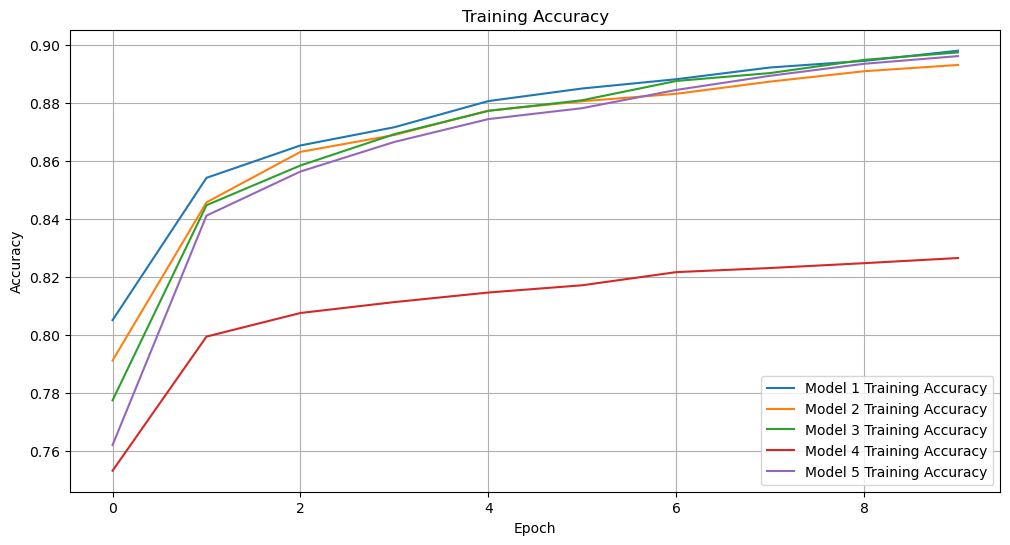

In [16]:
# Visualization of the training schedule
plot_training_histories([history_5], ['Model 5'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3, history_4, history_5], ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])

#### Conclusion: model_5 with batch_size=128 gives better test accuracy, than model_3 with batch_size=64

### Changing activation function: model_6 with three hidden layers, sigmoid activation, ADAMAX optimizer, 10 epochs, 20% Dropout and and batch size 128

In [17]:
# Implementation of the model
model_6 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_6.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_6 = model_6.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1.1955 - accuracy: 0.5608 - val_loss: 0.6964 - val_accuracy: 0.7526
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.6558 - accuracy: 0.7599 - val_loss: 0.5372 - val_accuracy: 0.8050
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5432 - accuracy: 0.8067 - val_loss: 0.4755 - val_accuracy: 0.8289
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4932 - accuracy: 0.8241 - val_loss: 0.4398 - val_accuracy: 0.8378
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.8375 - val_loss: 0.4280 - val_accuracy: 0.8429
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4392 - accuracy: 0.8437 - val_loss: 0.4059 - val_accuracy: 0.8532
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8490 - val_loss: 0.3934 - val_accuracy: 0.8547
Epoch 

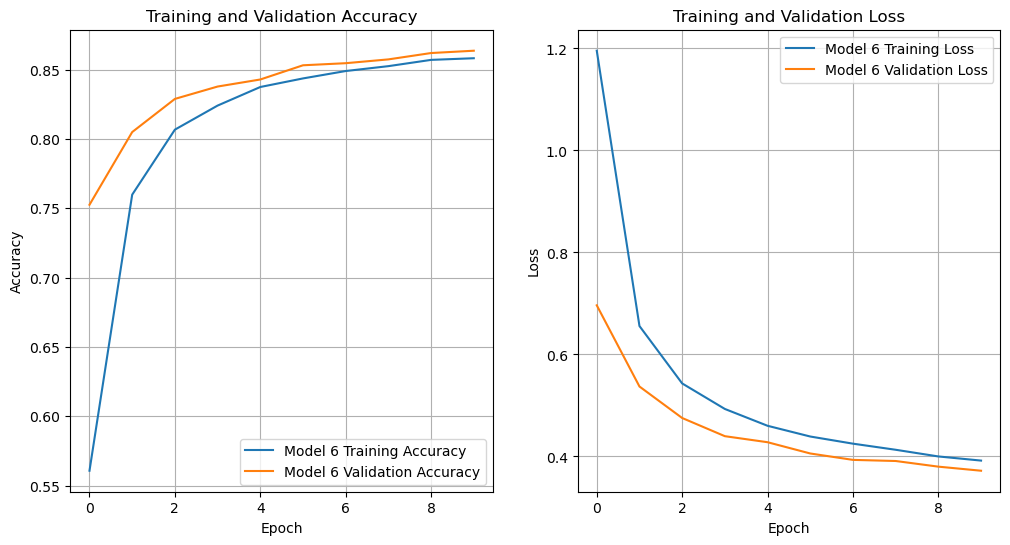

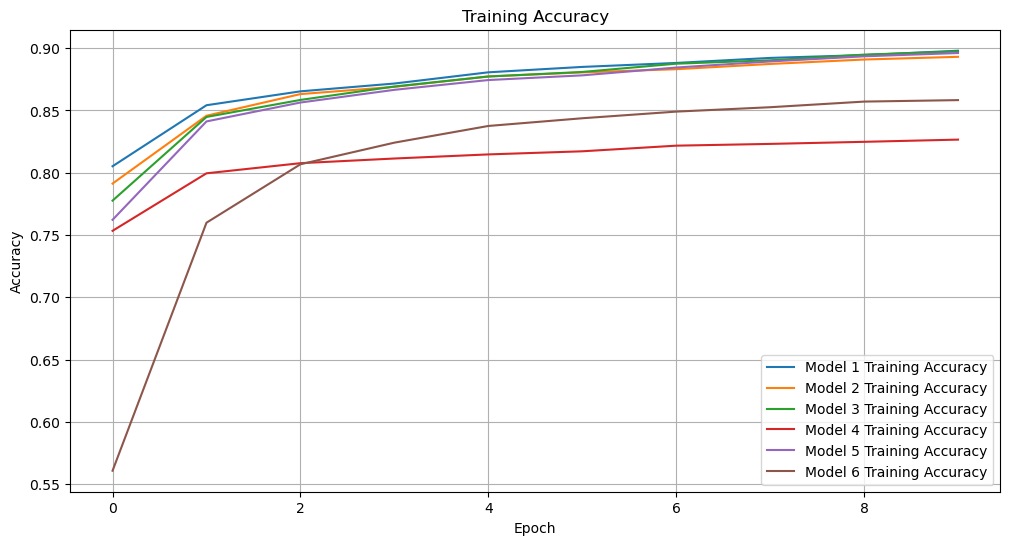

In [18]:
# Visualization of the training schedule
plot_training_histories([history_6], ['Model 6'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3, history_4, history_5, history_6], ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'])

#### Conclusion: model_5 with RELU activation gives better test accuracy, than model_6 with sigmoid activation

### Increasing the number of epochs: model_7 with three hidden layers, RELU activation, ADAMAX optimizer, 40 epochs, 20% Dropout and and batch size 128

In [19]:
# Implementation of the model
model_7 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_7.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_7 = model_7.fit(train_images, train_labels, epochs=40, batch_size=128, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_7.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/40
375/375 [==============================] - 2s 4ms/step - loss: 0.6761 - accuracy: 0.7590 - val_loss: 0.4497 - val_accuracy: 0.8363
Epoch 2/40
375/375 [==============================] - 1s 3ms/step - loss: 0.4550 - accuracy: 0.8389 - val_loss: 0.4002 - val_accuracy: 0.8540
Epoch 3/40
375/375 [==============================] - 1s 4ms/step - loss: 0.4016 - accuracy: 0.8557 - val_loss: 0.3906 - val_accuracy: 0.8590
Epoch 4/40
375/375 [==============================] - 1s 4ms/step - loss: 0.3700 - accuracy: 0.8683 - val_loss: 0.3534 - val_accuracy: 0.8706
Epoch 5/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3482 - accuracy: 0.8729 - val_loss: 0.3333 - val_accuracy: 0.8781
Epoch 6/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8786 - val_loss: 0.3410 - val_accuracy: 0.8748
Epoch 7/40
375/375 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.8843 - val_loss: 0.3227 - val_accuracy: 0.8823
Epoch 

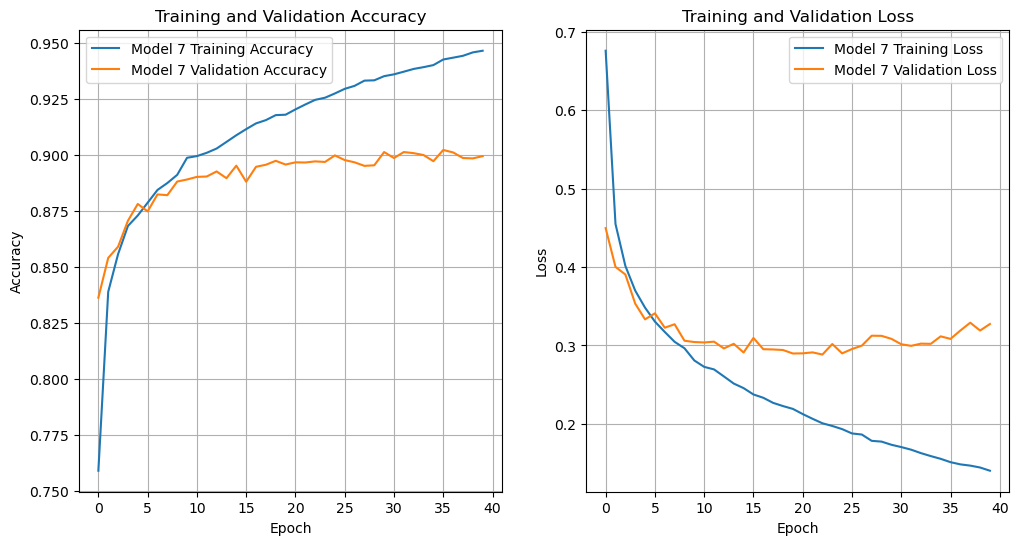

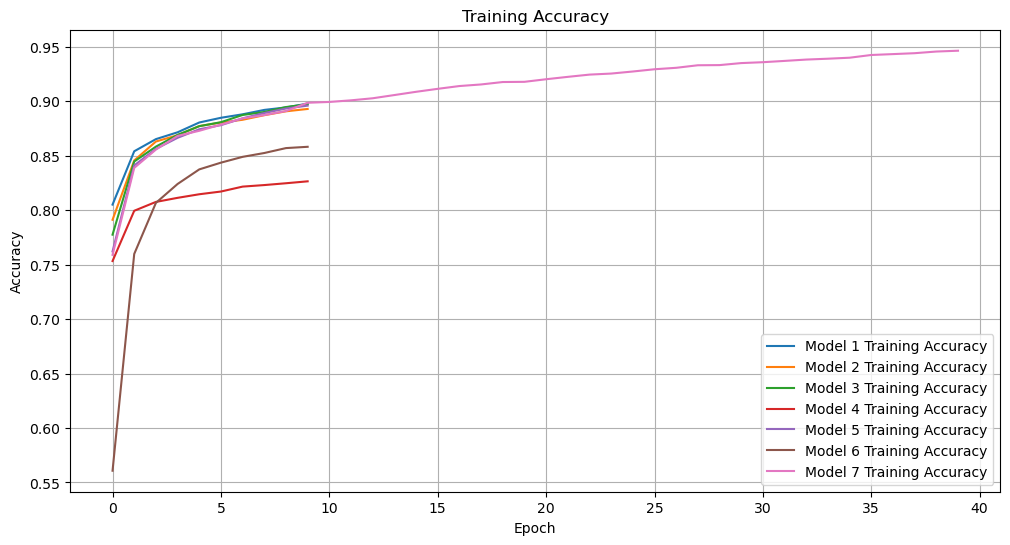

In [20]:
# Visualization of the training schedule
plot_training_histories([history_7], ['Model 7'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3, history_4, history_5, history_6, history_7], ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'])

### Сonclusion:

##### As we can see, we get the best test accuracy result 89,15% with the model_7, that has the following parameters: RELU activation, ADAMAX optimizer, 40 epochs, 20% Dropout and batch size 128

### Testing the work of the seventh model

313/313 [==============================] - 1s 2ms/step


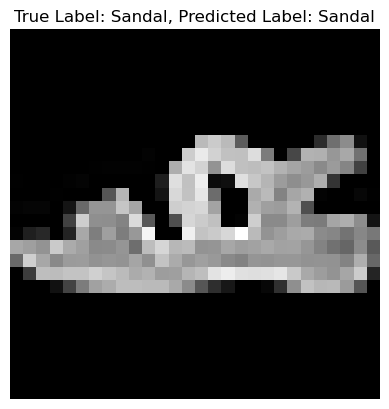

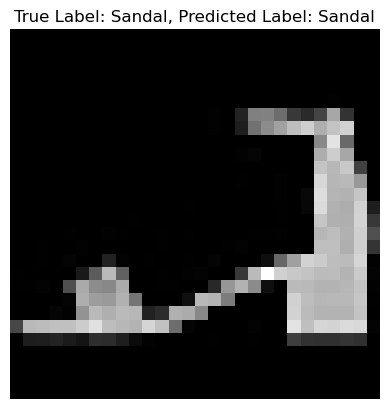

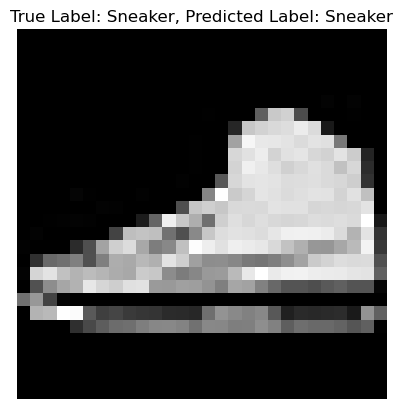

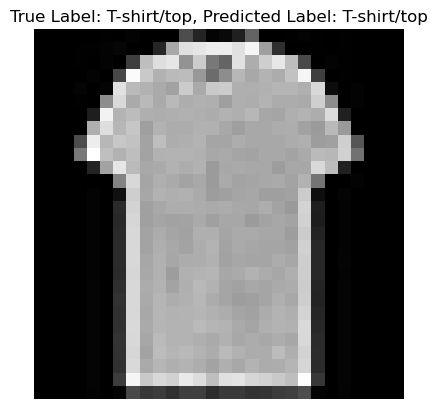

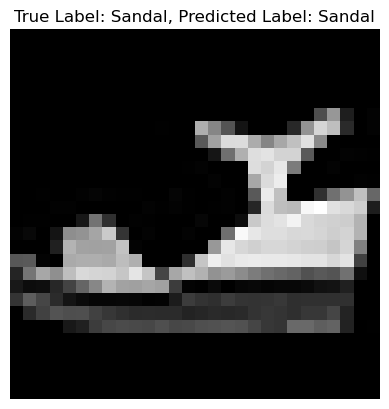

In [21]:
# Make predictions on test data
predictions = model_7.predict(test_images)

# Create a dictionary to map numerical labels to textual descriptions
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Visualize 5 random examples
for _ in range(5):
    # Select a random index
    index = np.random.randint(0, len(test_images))

    # Get the index where test_labels[index] equals 1
    true_label_index = np.argmax(test_labels[index])

    # Visualization
    plt.imshow(test_images[index], cmap='gray')
    plt.axis('off')
    true_label_text = class_labels[true_label_index] 
    predicted_label_text = class_labels[np.argmax(predictions[index])]
    plt.title(f'True Label: {true_label_text}, Predicted Label: {predicted_label_text}')
    plt.show()